(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


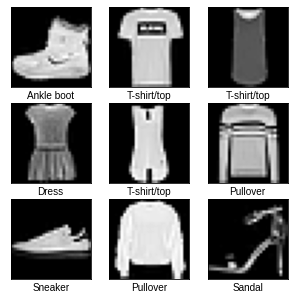

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

fig = plt.figure(figsize=(5,5))

for i, idx in enumerate(random_idx):
    plt.subplot(3,3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.style.use("seaborn")
plt.show()

# valid dataset + normalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

x_train = np.reshape(x_train/255, (-1,28,28,1))
x_val = np.reshape(x_val/255, (-1,28,28,1))
x_test = np.reshape(x_test/255, (-1,28,28,1))

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
# 모델 구성
model = Sequential([
    # (conv - act - pool)
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)), # MLP에서 첫 Input시, Flattened 된 상태로..
    MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',), 
    MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu',), 
    MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# compile, 학습과정 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 2s 6ms/step - loss: 0.6670 - acc: 0.7569 - val_loss: 0.4363 - val_acc: 0.8401
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4025 - acc: 0.8561 - val_loss: 0.3605 - val_acc: 0.8691
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3483 - acc: 0.8743 - val_loss: 0.3385 - val_acc: 0.8751
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3055 - acc: 0.8884 - val_loss: 0.3038 - val_acc: 0.8943
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2806 - acc: 0.8980 - val_loss: 0.2831 - val_acc: 0.8998
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2623 - acc: 0.9037 - val_loss: 0.2890 - val_acc: 0.8939
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2470 - acc: 0.9096 - val_loss: 0.2672 - val_acc: 0.9059
Epoch 8/30
329/329 [==============================] - 2s 5ms/step - loss: 0.

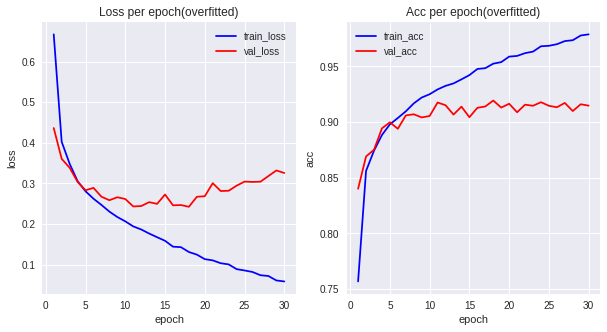

In [ ]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(10,5))

# loss 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title("Loss per epoch(overfitted)")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend()

# acc 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title("Acc per epoch(overfitted)")
ax2.set_xlabel("epoch")
ax2.set_ylabel("acc")
ax2.legend()

plt.style.use("seaborn")
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

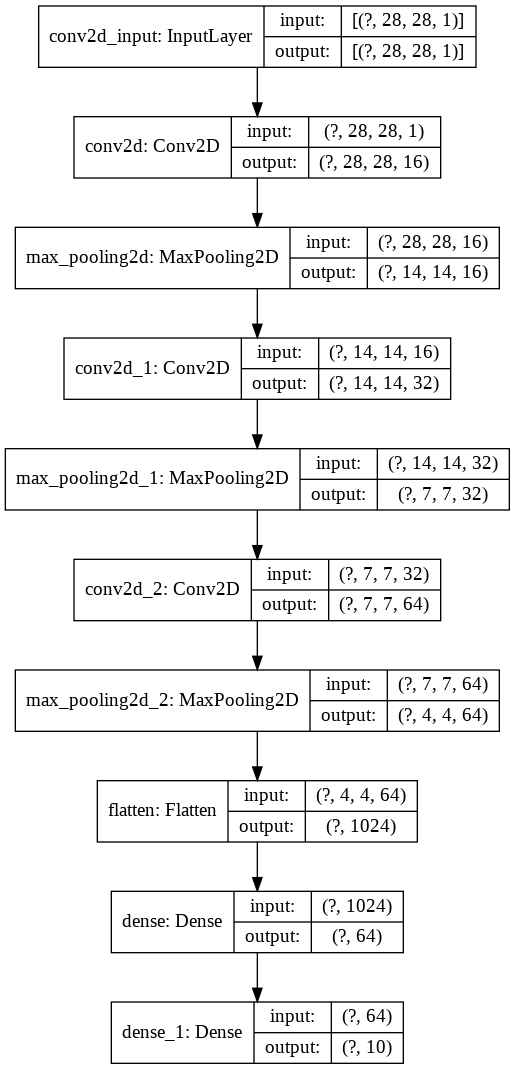

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes=True)